# BSS Verifications

In [1]:
import os
import sys
import time
import h5py
import numpy as np
from glob import glob
from datetime import datetime, timedelta

In [2]:
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/')
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/libs/')

from namelist import *
import data_utils as du
import verif_utils as vu
import graph_utils as gu

In [3]:
# graph tools
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

from matplotlib import ticker
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

In [4]:
need_publish = False

# True: publication quality figures
# False: low resolution figures in the notebook

if need_publish:
    dpi_ = fig_keys['dpi']
else:
    dpi_ = 75

In [5]:
colors_sub = np.array([[248, 206, 204], [218, 232, 252], [232, 232, 232]])/255
colors_main = [red, blue, cyan]
gray_main = np.array([102, 102, 102])/255
gray_sub = np.array([245, 245, 245])/255

In [6]:
LDM_temp_data = np.load(result_dir+'LDM_bss_all.npy', allow_pickle=True)[()]
RAW_temp_data = np.load(result_dir+'RAW_bss_all.npy', allow_pickle=True)[()]
AnEn_temp_data = np.load(result_dir+'AnEn_bss_all.npy', allow_pickle=True)[()]

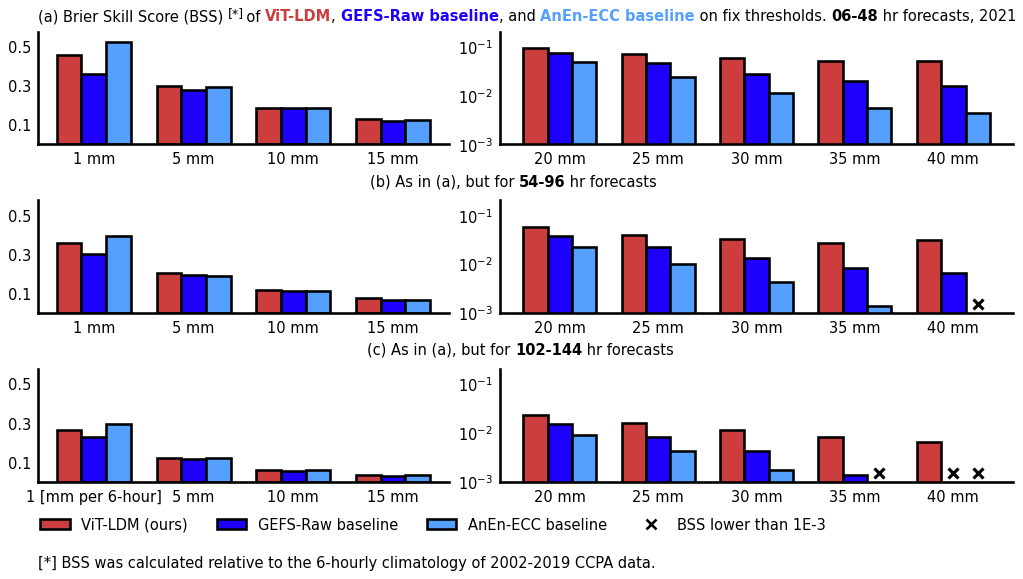

In [7]:
handles = []

fig = plt.figure(figsize=(13, 6), dpi=dpi_)
gs = gridspec.GridSpec(5, 3, height_ratios=[1, 0.5, 1, 0.5, 1], width_ratios=[1, 0.125, 1.25])

ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[2, 0])
ax2 = plt.subplot(gs[4, 0])

ax3 = plt.subplot(gs[0, 2])
ax4 = plt.subplot(gs[2, 2])
ax5 = plt.subplot(gs[4, 2])

AX_left = [ax0, ax1, ax2]
AX_right = [ax3, ax4, ax5]

plt.subplots_adjust(0, 0, 1, 1, hspace=0.0, wspace=0.0)

keys = ['BS_06_54', 'BS_54_102', 'BS_102_144']
x_label_ = ['1 [mm per 6-hour]', '5 mm', '10 mm', '15 mm', '20 mm', '25 mm', '30 mm', '35 mm', '40 mm']
x_labels = ['1 mm', '5 mm', '10 mm', '15 mm', '20 mm', '25 mm', '30 mm', '35 mm', '40 mm']

x_ref = np.arange(len(x_labels))
width = 0.4*0.618

sep = 4

for i, ax in enumerate(AX_left):
    ax = gu.ax_decorate(ax, left_flag=True, bottom_flag=True, bottom_spline=True)
    ax.grid(False)
    ax.set_ylim([0, 0.575])
    ax.set_yticks([0.1, 0.3, 0.5])
    ax.set_xticks(x_ref[:sep])
    if i == 2:
        ax.set_xticklabels(x_label_[:sep])
    else:
        ax.set_xticklabels(x_labels[:sep])
    
#ax.tick_params(labelbottom=True)
for i, ax in enumerate(AX_right):
    ax = gu.ax_decorate(ax, left_flag=True, bottom_flag=True, bottom_spline=True)
    ax.grid(False)
    ax.set_yscale('log')
    ax.set_ylim([1e-3, 2e-1])
    ax.set_xticks(x_ref[sep:])
    ax.set_xticklabels(x_labels[sep:])

for i, key in enumerate(keys):
    # errbar = 0.5*(np.quantile(LDM_temp_data[key], 0.95, axis=1) - np.quantile(LDM_temp_data[key], 0.05, axis=1))
    # yerr=errbar[:sep]
    AX_left[i].bar(x_ref[:sep]-width, np.mean(LDM_temp_data[key], axis=1)[:sep], width, 
                   facecolor=colors_main[0], edgecolor='k', linewidth=2.5)
    AX_right[i].bar(x_ref[sep:]-width, np.mean(LDM_temp_data[key], axis=1)[sep:], width,
                    facecolor=colors_main[0], edgecolor='k', linewidth=2.5)
    
    #errbar = 0.5*(np.quantile(RAW_temp_data[key], 0.95, axis=1) - np.quantile(RAW_temp_data[key], 0.05, axis=1))
    AX_left[i].bar(x_ref[:sep], np.mean(RAW_temp_data[key], axis=1)[:sep], width,
                   facecolor=colors_main[1], edgecolor='k', linewidth=2.5)
    AX_right[i].bar(x_ref[sep:], np.mean(RAW_temp_data[key], axis=1)[sep:], width,
                    facecolor=colors_main[1], edgecolor='k', linewidth=2.5)
    
    #errbar = 0.5*(np.quantile(AnEn_temp_data[key], 0.95, axis=1) - np.quantile(AnEn_temp_data[key], 0.05, axis=1))
    AX_left[i].bar(x_ref[:sep]+width, np.mean(AnEn_temp_data[key], axis=1)[:sep], width,
                   facecolor=colors_main[2], edgecolor='k', linewidth=2.5)
    AX_right[i].bar(x_ref[sep:]+width, np.mean(AnEn_temp_data[key], axis=1)[sep:], width,
                    facecolor=colors_main[2], edgecolor='k', linewidth=2.5)

ax4.plot(x_ref[-1]+width, 1.5e-3, 'x', ms=10, mew=3, mec='k', mfc='k')
ax5.plot(x_ref[-2]+width, 1.5e-3, 'x', ms=10, mew=3, mec='k', mfc='k')
ax5.plot(x_ref[-1], 1.5e-3, 'x', ms=10, mew=3, mec='k', mfc='k')
ax5.plot(x_ref[-1]+width, 1.5e-3, 'x', ms=10, mew=3, mec='k', mfc='k')

ax_title1 = fig.add_axes([0.0, 1+0.015, 1.0, 0.04])
title_len = 1.0; fontsize_list = [14,]*10
fontweight_list = ['normal', 'bold', 'normal', 'bold', 'normal', 'bold', 'normal', 'bold', 'normal']
handles += gu.string_partial_format(fig, ax_title1, 0.5*(1-title_len), 0.5, 'left', 'center', 
                                    ['(a) Brier Skill Score (BSS)     of ',
                                     'ViT-LDM', ', ', 'GEFS-Raw baseline', ', and ', 'AnEn-ECC baseline', 
                                     ' on fix thresholds. ', '06-48', ' hr forecasts, 2021'], 
                                    ['k', colors_main[0], 'k', colors_main[1], 'k', colors_main[2], 'k', 'k', 'k'], 
                                    fontsize_list, fontweight_list)
ax_title1.text(0.195, 1.0, '[*]', va='top', fontsize=12, transform=ax_title1.transAxes);



ax_title2 = fig.add_axes([0.0, 2/3-0.02, 1.0, 0.04])
title_len = 0.32; fontsize_list = [14,]*10
fontweight_list = ['normal', 'bold', 'normal', 'bold', 'normal', 'bold', 'normal', 'bold', 'normal']
handles += gu.string_partial_format(fig, ax_title2, 0.5*(1-title_len), 0.5, 'left', 'center', 
                                    ['(b) As in (a), but for ', '54-96', ' hr forecasts'], 
                                    ['k']*3, fontsize_list, fontweight_list)

ax_title3 = fig.add_axes([0.0, 1/3-0.06, 1.0, 0.04])
title_len = 0.325; fontsize_list = [14,]*10
fontweight_list = ['normal', 'bold', 'normal', 'bold', 'normal', 'bold', 'normal', 'bold', 'normal']
handles += gu.string_partial_format(fig, ax_title3, 0.5*(1-title_len), 0.5, 'left', 'center', 
                                    ['(c) As in (a), but for ', '102-144', ' hr forecasts'], 
                                    ['k']*3, fontsize_list, fontweight_list)

handle_lg = []
handle_lg.append(patches.Patch(facecolor=colors_main[0], edgecolor='k', linewidth=2.5, label=''))
handle_lg.append(patches.Patch(facecolor=colors_main[1], edgecolor='k', linewidth=2.5, label=''))
handle_lg.append(patches.Patch(facecolor=colors_main[2], edgecolor='k', linewidth=2.5, label=''))
handle_lg.append(mlines.Line2D([], [], label='', marker='x', 
                               mec='k', mew=2.5, ms=10, mfc='k', linewidth=0))

ax_lg1 = fig.add_axes([0.0, -0.125, 0.8215, 0.075])
LG1 = ax_lg1.legend(handle_lg, ['ViT-LDM (ours)', 
                                'GEFS-Raw baseline', 
                                'AnEn-ECC baseline', 
                                'BSS lower than 1E-3'], 
                    bbox_to_anchor=(1, 1), ncol=4, prop={'size':14})

LG1.get_frame().set_facecolor('white')
LG1.get_frame().set_edgecolor('k')
LG1.get_frame().set_linewidth(0)


# ax_w1 = fig.add_axes([0.0, -0.225, 1, 0.075])
# ax_w1.text(0, 0.5, '[*] BSS was calculated relative to the 6-hourly climatology of 2002-2019 CCPA data.\n     Bootstrap replicates were conducted, but the 95% confidence intervals were small and ignorable.', 
#           ha='left', va='center', fontsize=14, transform=ax_w1.transAxes);

ax_w1 = fig.add_axes([0.0, -0.2, 1, 0.0375])
ax_w1.text(0, 0.5, '[*] BSS was calculated relative to the 6-hourly climatology of 2002-2019 CCPA data.', 
          ha='left', va='center', fontsize=14, transform=ax_w1.transAxes);

ax_lg1.set_axis_off()
ax_title1.set_axis_off()
ax_title2.set_axis_off()
ax_title3.set_axis_off()
ax_w1.set_axis_off()

if need_publish:
    # Save figure
    fig.savefig(fig_dir+'fig8_bss.png', format='png', **fig_keys)